<a href="https://colab.research.google.com/github/mmuirigo/Aviation-Project/blob/main/Aviation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BUSINESS UNDERSTANDING**

###**Problem** **Statement**
The Company seeks to diversify its business portfolio by entering the aviation industry through the acquisition and operation of aircrafts for both commercial and private enterprises. The company needs to identify aircraft models with the lowest associated risks, as it acclimates to this new sector.
It is crucial for the company to select aircrafts that have a proven track record of safety, with minimal history of accidents and incidents, in order to:
*   Ensure the safety of passengers and cargo
*   Safeguard the company’s investment and protect the reputation of the newly launched aviation venture.

By thoroughly assessing aircraft safety records and selecting models with a history of low-risk operation, the company aims to minimize potential liabilities and establish a strong foundation in the aviation market.


### **Business Goals**


1.   **Minimize accident risk:**
Identify aircrafts with the best safety records, particularly those with low accidents and incidents. This will help the company reduce liability, ensure passenger and crew safety, and prevent costly disruptions to operations.
2.  **Accident history analysis:** Evaluate the accident history of various aircraft makes to determine which have the most reliable safety performance. This includes reviewing survival rate after accidents.
3.   **Operational efficiency based on market demand:**
Prioritize aircraft models which have a good balance between market demand and higher survival rate.



### **Success Criteria**


1.  **Aircraft selection based on severity of accident record:**
Successful selection will focus on aircrafts with the low fatalities from accidents and incidents.
2.   **Aicraft selection based operational efficiency and market demand:** Successful selection will focus on aircrafts with minimal damage after an accident or incident.




### **Challenges**


1.   **Incompleteness of data:**
The available data may have missing or incomplete information in certain categories (e.g., Report Status, Purpose of Flight, or Weather Conditions). This lack of comprehensive data could impact the accuracy and reliability of the risk analysis, making it challenging to draw definitive conclusions about the safety record of different aircraft models.
2.   **Manufacturer modifications:** Some of the aircraft makes may have had previous safety issues which were later adressed with upgrades or modifications.Evaluating the effectiveness of these modifications is crucial in determining ongoing safety risks.
3. **Missing information that is important:** For analysis of aircrafts to be comprehensive it would be better if we had information on age of aircrafts, maintenance history and regulatory status. This would significantly enhance the comprehensiveness and depth of the analysis


#**DATA UNDERSTANDING**

### **Objective**:
The goal is to help the company assess the safest aircraft makes as it expands into the aviation industry. We need to identify which aircrafts have the lowest risk of accidents, so the company can make informed decisions about which aircrafts to purchase for commercial and private operations.
### **Key Questions:**

1.   **Which aircrafts are the safest?**
We need to determine which makes/models have the lowest accident/incident rates.
2.   **What aircarfts have market demand?**
We need to identify aircrafts that woul make business sense based on safety and demand.
3. **What geographical location is best to operate in?**
We need to identify what geographical location we need to start the aviation operation on based on accident rates.





### **Data Sources**


*   **About Dataset:**The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.
*   **Author Name and Bio:** NTSB
[https://www.ntsb.gov/_layouts/ntsb.aviation/index.aspx](https://)
*   **Coverage**:
Temporal Coverage Start Date-10/23/1948
Temporal Coverage End Date-05/27/2020.
Geospatial Coverage-All Countries
*   **Collection Methodology:** Downloading the original file From: [https://www.ntsb.gov/_layouts/ntsb.aviation/index.aspx](https://) kind of light preprocessing and then transformed to CSV file.







### **Data Description**
 The data consists of 31 columns and 88,888 rows. For purposes of this analysis, we will base our conclusions from below categories of the data:
*   Quantitative Data: Total Fatal Injuries, Total Serious Injuries, Total Minor Injuries, Total Uninjured
*   Qualitative Data: Event Date, Country, Injury.Severity, Make, Purpose of flight







### **Challenges**
1.   **Incomplete Data:** Some data may be missing, such as Report Status, Weather Condition which could impact the analysis.
2.   **Data Quality:** Some key aspects which could impact the conclusive selection of particular aircrafts makes/models could be missing. e.g, aircraft age, maintenance history and regulatory status.



#**DATA PREPARATION**



### **Data Collection:**
Data availed from The NTSB aviation accident dataset up to Feb 2021

### **Data Cleaning**
This will be handled through

1. Handling Duplicates: Ensuring there are no repeated records
2.Handling Missing Data:Fill in or remove incomplete data points, such as missing report status.
3.Creation of new columns
4.Exploratory Data Analysis (EDA)
5. Grouping sets of data using pandas' groupby method







# **DATA ANALYSIS**

### **Exploratory Data Analysis (EDA)**
We will explore the data to see what it contains and how this will help us process the data to provide answers to our key questions.

In [19]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
#Read the data file and check first 5 rows
df = pd.read_excel('/content/drive/MyDrive/AviationData.xlsx',)
df.head(5)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20221026106206,Accident,WPR23LA025,2022-10-25,"Alturas, CA",United States,412912N,1203355W,ATT,NaN,...,Unknown,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,22-11-2022
1,20220809105704,Accident,CEN22FA376,2022-08-09,"Centennial, CO",United States,393412N,1045057W,KAPA,Centennial Airport,...,Unknown,NaN,1.0,0.0,0.0,0.0,VMC,NaN,NaN,2022-09-09 00:00:00
2,20220726105576,Accident,CEN22LA341,2022-07-16,"Riverdale, NE",United States,404643N,0099102W,43NE,ONION CREST AIRPARK,...,Unknown,HAWKFITZ LLC,0.0,1.0,0.0,4.0,VMC,NaN,NaN,2022-12-08 00:00:00
3,20220915105946,Accident,ANC22LA076,2022-05-28,"Wasilla, AK",United States,061324N,1495842W,PVT,Call of the wild,...,Unknown,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,16-09-2022
4,20220322104810,Accident,CEN22LA147,2022-03-13,"Texarkana, AR",United States,332544N,0094253W,64XS,Heliport Texarkana Wadley Regi,...,Unknown,Arkansas Children's Hospital,0.0,0.0,0.0,3.0,VMC,NaN,The pilot’s failure to maintain adequate clear...,2022-05-07 00:00:00


In [17]:
#check last 5 rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20020917X04065,Incident,NYC82IA137,1982-07-05,"FLUSHING, NY",United States,NaN,NaN,LGA,LAGUARDIA,...,NaN,Air Canada,NaN,NaN,NaN,74.0,VMC,Climb,Probable Cause,2014-04-12 00:00:00
88885,20020917X02937,Accident,CHI82DA191,1982-05-29,"DETROIT, MI",United States,NaN,NaN,DTW,DETROIT METROPOLITAN,...,NaN,NaN,0.0,0.0,0.0,3.0,IMC,Approach,Probable Cause,29-05-1983
88886,20020917X04154,Accident,SEA82FA070,1982-05-13,"6NM SSE WRANGEL, AK",United States,NaN,NaN,NaN,NaN,...,NaN,Ronald Gohmert,NaN,NaN,1.0,3.0,VMC,Cruise,Probable Cause,2011-09-12 00:00:00
88887,20020917X02151,Incident,FTW82IA062,1982-02-19,"HARLINGEN, TX",United States,NaN,NaN,HRL,HARLINGEN IND.AIR PARK,...,NaN,Mexicana Airlines,NaN,NaN,NaN,83.0,IMC,Landing,Probable Cause,2014-04-12 00:00:00
88888,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017


Get an overview of the data using .infoand .describe to get**:** columns, rows, count, mean etc

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            52704 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [21]:
df.describe()

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88889,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1999-09-17 17:13:39.354475520,1.146585,0.647855,0.279881,0.357061,5.325440
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989-01-15 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1998-07-18 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2009-07-01 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000
std,NaN,0.446510,5.485960,1.544084,2.235625,27.913634


### **Handling missing values**
Drop columns and rows with high percentage of missing values.Drop columns with more than 60% missing data.
Drop rows with minimum missing data i.e.Injury.Severity, Aircraft.damage, Make, Model, Location, Country




In [22]:
df.isna().mean()*100

,0
Event.Id,0.000000
Investigation.Type,0.000000
Accident.Number,0.000000
Event.Date,0.000000
Location,0.058500
Country,0.254250
Latitude,61.320298
Longitude,61.330423
Airport.Code,43.601570
Airport.Name,40.708074


In [23]:
#Drop  columns where the percentage of missing data is more than 60%
missing_percentage = df.isna().mean() * 100
df.drop(columns=missing_percentage[missing_percentage > 60].index, inplace=True)
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [24]:
#Droping rows with null values in below columns
df.dropna(subset=['Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 'Location', 'Country'], inplace=True)


In [25]:
#Confirm percentage of the null values is now below 60%
df.isna().mean()*100

,0
Event.Id,0.000000
Investigation.Type,0.000000
Accident.Number,0.000000
Event.Date,0.000000
Location,0.000000
Country,0.000000
Airport.Code,42.466448
Airport.Name,39.505344
Injury.Severity,0.000000
Aircraft.damage,0.000000


### **Adding new columns to the DataFrame**

Create two new columns
* Total.Passengers: to find total number of passengers on board each aircraft
*  Survival.Rate: to find the percentage rate of survival per aircraft after and accident



In [26]:
#Find total passengers per flight by adding the Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured
df['Total.Passengers'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries']+ df['Total.Minor.Injuries'] + df['Total.Uninjured']
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Passengers
0,20221026106206,Accident,WPR23LA025,2022-10-25,"Alturas, CA",United States,ATT,NaN,Fatal,Substantial,...,Unknown,1.0,0.0,0.0,0.0,NaN,NaN,NaN,22-11-2022,1.0
1,20220809105704,Accident,CEN22FA376,2022-08-09,"Centennial, CO",United States,KAPA,Centennial Airport,Fatal,Destroyed,...,Unknown,1.0,0.0,0.0,0.0,VMC,NaN,NaN,2022-09-09 00:00:00,1.0
2,20220726105576,Accident,CEN22LA341,2022-07-16,"Riverdale, NE",United States,43NE,ONION CREST AIRPARK,Minor,Substantial,...,Unknown,0.0,1.0,0.0,4.0,VMC,NaN,NaN,2022-12-08 00:00:00,5.0
3,20220915105946,Accident,ANC22LA076,2022-05-28,"Wasilla, AK",United States,PVT,Call of the wild,Non-Fatal,Substantial,...,Unknown,0.0,0.0,0.0,1.0,VMC,NaN,NaN,16-09-2022,1.0
4,20220322104810,Accident,CEN22LA147,2022-03-13,"Texarkana, AR",United States,64XS,Heliport Texarkana Wadley Regi,Non-Fatal,Substantial,...,Unknown,0.0,0.0,0.0,3.0,VMC,NaN,The pilot’s failure to maintain adequate clear...,2022-05-07 00:00:00,3.0


In [27]:
#Find survival rate per aircraft by taking away total fatal injuries from the total passengers
df['Survival.Rate'] = 100-((df['Total.Fatal.Injuries'] / df['Total.Passengers'])*100)


### **Plots to answer our Key Questions**

#### **Question 1: What geographical location is best to operate in?**
To answer this question we will plot below:
1.   Stacked bar plot to demonastrate the different continents VS injury severity for each. Severity is in 6 categories: 'Fatal', 'Minor', 'Non-Fatal', 'Unknown', 'Incident', 'Serious'
2.   List item


In [28]:
#Categorize all countries in the data to their corresponding continents
countries = [
    "Afghanistan", "Albania", "Algeria", "American Samoa", "Angola", "Anguilla", "Antarctica",
    "Antigua And Barbuda", "Argentina", "Aruba", "Australia", "Austria", "Bahamas", "Bahrain",
    "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bolivia", "Bosnia and Herzegovina",
    "Botswana", "Brazil", "Bulgaria", "Cambodia", "Cameroon", "Canada", "Chad", "Chile", "China",
    "Colombia", "Congo", "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czech Republic", "Denmark",
    "Dominica", "Ecuador", "Egypt", "El Salvador", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland",
    "France", "Georgia", "Germany", "Greece", "Guatemala", "Guyana", "Honduras", "Hungary", "Iceland",
    "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Kazakhstan",
    "Kenya", "Korea, Republic Of", "Latvia", "Lebanon", "Liberia", "Libya", "Lithuania", "Luxembourg",
    "Malaysia", "Malta", "Mexico", "Morocco", "Mozambique", "Namibia", "Nepal", "Netherlands",
    "New Zealand", "Nicaragua", "Nigeria", "Norway", "Pakistan", "Panama", "Paraguay", "Peru",
    "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russia","Rwanda","Saint Barthelemy","Saint Pierre and Miquelon","Saint Vincent and the Grenadines","San Juan Islands",
    "Saudi Arabia","Scotland","Senegal","Serbia","Seychelles","Sierra Leone","Singapore","Sint Maarten","Slovakia",
    "Slovenia","Solomon Islands","Somalia","South Africa","South Korea","South Korean","South Sudan","Spain","St Kitts And Nevis",
    "St Lucia","St Vincent And The Grenadines","Sudan","Suriname","Sweden","Switzerland","Taiwan","Tanzania","Thailand","Tokelau",
    "Trinidad And Tobago","Tunisia","Turkey","Turks And Caicos","Uganda","Ukraine","United Arab Emirates","United Kingdom",
    "United States","Uruguay","Venezuela","Vietnam","Virgin Islands","Yemen","Zambia","Zimbabwe"
]
continent_mapping = {
    "Afghanistan": "Asia","Albania": "Europe","Algeria": "Africa","American Samoa": "Oceania","Angola": "Africa","Anguilla": "N America","Antarctica": "Antarctica","Antigua And Barbuda": "N America","Argentina": "S America","Aruba": "N America",
    "Australia": "Oceania","Austria": "Europe","Bahamas": "N America","Bahrain": "Asia","Bangladesh": "Asia","Barbados": "N America","Belarus": "Europe","Belgium": "Europe","Belize": "N America","Benin": "Africa","Bolivia": "S America",
    "Bosnia and Herzegovina": "Europe","Botswana": "Africa","Brazil": "S America","Bulgaria": "Europe","Cambodia": "Asia","Cameroon": "Africa","Canada": "S America","Chad": "Africa","Chile": "S America","China": "Asia","Colombia": "S America",
    "Congo": "Africa","Costa Rica": "N America","Croatia": "Europe","Cuba": "N America","Cyprus": "Europe","Czech Republic": "Europe","Denmark": "Europe","Dominica": "N America","Ecuador": "S America","Egypt": "Africa","El Salvador": "N America",
    "Estonia": "Europe","Eswatini": "Africa","Ethiopia": "Africa","Fiji": "Oceania","Finland": "Europe","France": "Europe","Georgia": "Asia","Germany": "Europe","Greece": "Europe","Guatemala": "N America","Guyana": "S America",
    "Honduras": "N America","Hungary": "Europe","Iceland": "Europe","India": "Asia","Indonesia": "Asia","Iran": "Asia","Iraq": "Asia","Ireland": "Europe","Israel": "Asia","Italy": "Europe","Jamaica": "N America","Japan": "Asia",
    "Kazakhstan": "Asia","Kenya": "Africa","Korea, Republic Of": "Asia","Latvia": "Europe","Lebanon": "Asia","Liberia": "Africa","Libya": "Africa","Lithuania": "Europe","Luxembourg": "Europe","Malaysia": "Asia","Malta": "Europe",
    "Mexico": "N America","Morocco": "Africa","Mozambique": "Africa","Namibia": "Africa","Nepal": "Asia","Netherlands": "Europe","New Zealand": "Oceania","Nicaragua": "N America","Nigeria": "Africa","Norway": "Europe",
    "Pakistan": "Asia","Panama": "N America","Paraguay": "S America","Peru": "S America","Philippines": "Asia","Poland": "Europe","Portugal": "Europe","Qatar": "Asia","Romania": "Europe","Russia": "Asia","Rwanda": "Africa","Saint Barthelemy": "N America", "Saint Pierre and Miquelon": "N America", "Saint Vincent and the Grenadines": "N America",
    "San Juan Islands": "N America", "Saudi Arabia": "Asia", "Scotland": "Europe", "Senegal": "Africa", "Serbia": "Europe", "Seychelles": "Africa","Sierra Leone": "Africa", "Singapore": "Asia", "Sint Maarten": "N America", "Slovakia": "Europe", "Slovenia": "Europe", "Solomon Islands": "Oceania",
    "Somalia": "Africa", "S Africa": "Africa", "South Korea": "Asia", "South Sudan": "Africa", "Spain": "Europe", "St Kitts And Nevis": "N America","St Lucia": "N America", "St Vincent And The Grenadines": "N America", "Sudan": "Africa", "Suriname": "S America", "Sweden": "Europe",
    "Switzerland": "Europe", "Taiwan": "Asia", "Tanzania": "Africa", "Thailand": "Asia", "Tokelau": "Oceania", "Trinidad And Tobago": "N America","Tunisia": "Africa", "Turkey": "Asia", "Turks And Caicos": "N America", "Uganda": "Africa", "Ukraine": "Europe", "United Arab Emirates": "Asia",
    "United Kingdom": "Europe", "United States": "N America", "Uruguay": "S America", "Venezuela": "S America", "Vietnam": "Asia", "Virgin Islands": "N America",
    "Yemen": "Asia", "Zambia": "Africa", "Zimbabwe": "Africa"
}

# Use .map() to add the continent column
df['Continent'] = df['Country'].map(continent_mapping)

# Display the result
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Passengers,Survival.Rate,Continent
0,20221026106206,Accident,WPR23LA025,2022-10-25,"Alturas, CA",United States,ATT,NaN,Fatal,Substantial,...,0.0,0.0,0.0,NaN,NaN,NaN,22-11-2022,1.0,0.0,N America
1,20220809105704,Accident,CEN22FA376,2022-08-09,"Centennial, CO",United States,KAPA,Centennial Airport,Fatal,Destroyed,...,0.0,0.0,0.0,VMC,NaN,NaN,2022-09-09 00:00:00,1.0,0.0,N America
2,20220726105576,Accident,CEN22LA341,2022-07-16,"Riverdale, NE",United States,43NE,ONION CREST AIRPARK,Minor,Substantial,...,1.0,0.0,4.0,VMC,NaN,NaN,2022-12-08 00:00:00,5.0,100.0,N America
3,20220915105946,Accident,ANC22LA076,2022-05-28,"Wasilla, AK",United States,PVT,Call of the wild,Non-Fatal,Substantial,...,0.0,0.0,1.0,VMC,NaN,NaN,16-09-2022,1.0,100.0,N America
4,20220322104810,Accident,CEN22LA147,2022-03-13,"Texarkana, AR",United States,64XS,Heliport Texarkana Wadley Regi,Non-Fatal,Substantial,...,0.0,0.0,3.0,VMC,NaN,The pilot’s failure to maintain adequate clear...,2022-05-07 00:00:00,3.0,100.0,N America


In [29]:
#Find number of unique values in column Injury.Severity
df['Injury.Severity'].unique()

array(['Fatal', 'Minor', 'Non-Fatal', 'Fatal(3)', 'Fatal(1)', 'Fatal(5)',
       'Fatal(2)', 'Unavailable', 'Fatal(4)', 'Fatal(6)', 'Incident',
       'Fatal(24)', 'Fatal(8)', 'Fatal(10)', 'Fatal(143)', 'Fatal(11)',
       'Fatal(113)', 'Fatal(7)', 'Fatal(13)', 'Fatal(131)', 'Fatal(88)',
       'Fatal(169)', 'Fatal(18)', 'Fatal(217)', 'Fatal(12)', 'Fatal(80)',
       'Fatal(16)', 'Fatal(229)', 'Fatal(15)', 'Fatal(87)', 'Fatal(52)',
       'Fatal(104)', 'Fatal(75)', 'Fatal(228)', 'Fatal(35)', 'Fatal(29)',
       'Fatal(125)', 'Fatal(14)', 'Fatal(97)', 'Fatal(34)', 'Fatal(70)',
       'Fatal(230)', 'Fatal(110)', 'Fatal(33)', 'Fatal(123)',
       'Fatal(189)', 'Fatal(160)', 'Fatal(72)', 'Fatal(9)', 'Fatal(65)',
       'Fatal(54)', 'Fatal(68)', 'Fatal(132)', 'Fatal(37)', 'Fatal(56)',
       'Fatal(47)', 'Fatal(27)', 'Fatal(23)', 'Fatal(25)', 'Fatal(73)',
       'Fatal(20)', 'Fatal(111)', 'Fatal(174)', 'Fatal(144)',
       'Fatal(270)', 'Fatal(43)', 'Fatal(28)', 'Fatal(156)', 'Fatal(82)',
 

In [30]:
 # Use str.replace() to remove the numbers in parentheses and standardize as 'Fatal'
df['Injury.Severity'] = df['Injury.Severity'].str.replace(r'\(.*\)', 'Fatal', regex=True)
df['Injury.Severity'] = df['Injury.Severity'].str.replace('FatalFatal', 'Fatal', regex=False)
df['Injury.Severity'] = df['Injury.Severity'].str.replace('Unavailable', 'Fatal', regex=False)
#replace nan with unknown
df['Injury.Severity'] = df['Injury.Severity'].fillna('Unknown')

In [31]:
#Calculate total sum under each category of Injury.Severity per continent
injury = df['Injury.Severity'].value_counts()
injury_counts_by_continent = df.groupby(['Continent', 'Injury.Severity']).size().unstack(fill_value=0)
injury_counts_by_continent

Injury.Severity,Fatal,Incident,Minor,Non-Fatal,Serious
Continent,,,,,
Africa,103,2,0,68,0
Antarctica,1,0,0,4,0
Asia,284,26,0,235,3
Europe,674,76,3,494,1
N America,15279,1216,195,64063,136
Oceania,186,6,1,77,5
S America,774,29,4,340,6


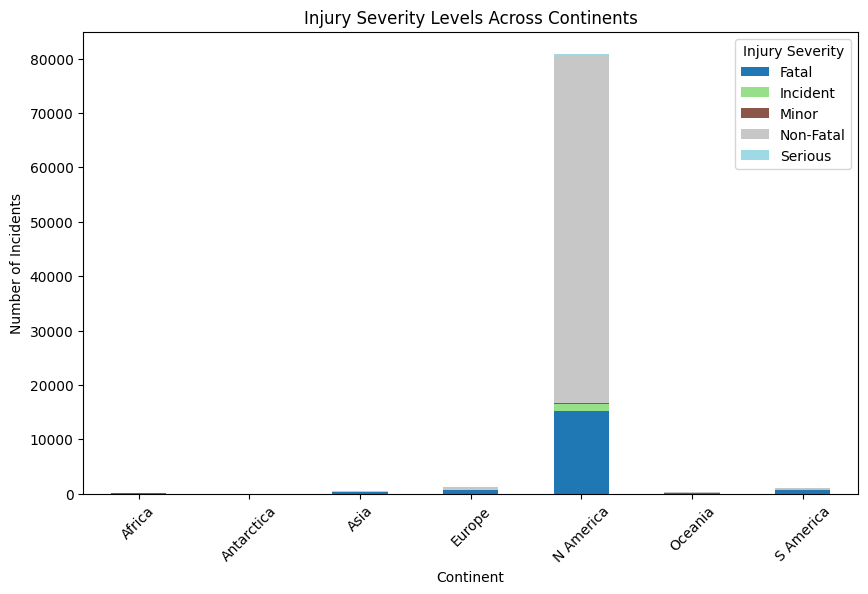

In [58]:
#Group columns Continent and Injury.Severity
continent_injury_counts = df.groupby(['Continent', 'Injury.Severity']).size().unstack(fill_value=0)

#Plot a stacked bar plot for better visualization of injury severity distribution across continents
continent_injury_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))
plt.title('Injury Severity Levels Across Continents')
plt.xlabel('Continent')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')
plt.show()

In [33]:
#Find Survival rae per continent
continent_fatalities = df.groupby('Continent').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Passengers': 'sum'})

continent_fatalities['Survival.Percentage'] = ((continent_fatalities['Total.Passengers'] - continent_fatalities['Total.Fatal.Injuries']) / continent_fatalities['Total.Passengers']) * 100

continent_fatalities

,Total.Fatal.Injuries,Total.Passengers,Survival.Percentage
Continent,,,
Africa,1988.0,2844.0,30.098453
Antarctica,2.0,15.0,86.666667
Asia,5020.0,16288.0,69.179764
Europe,3535.0,14040.0,74.821937
N America,31696.0,238445.0,86.707207
Oceania,367.0,1319.0,72.175891
S America,4507.0,9094.0,50.439850


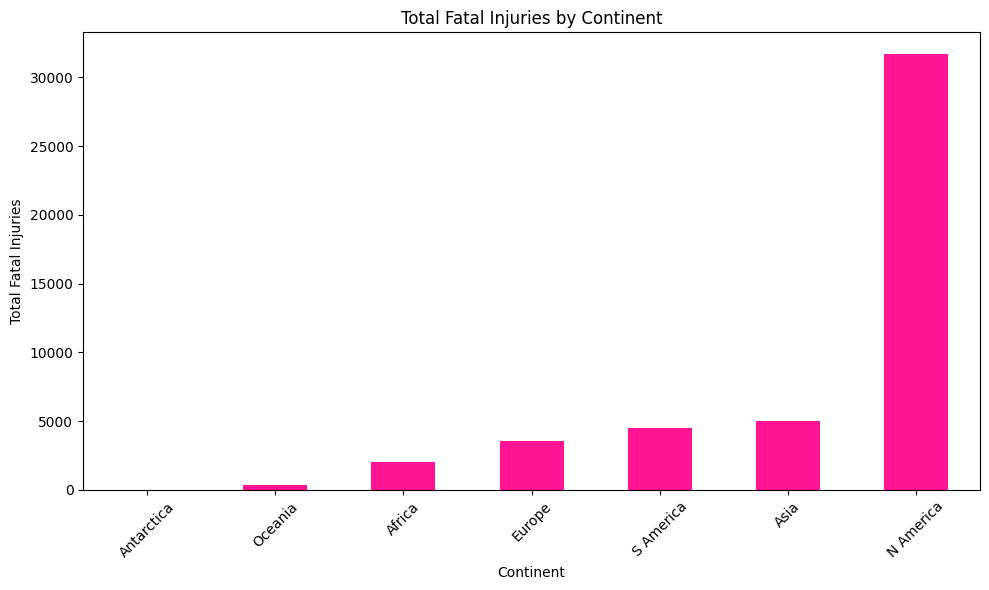

In [55]:
# Group by continent and the total fatalities per continent
continent_fatalities = df.groupby('Continent')['Total.Fatal.Injuries'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
continent_fatalities.sort_values().plot(kind='bar', color='deeppink')
plt.title('Total Fatal Injuries by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### **Question 2 and 3**
1.   **Which aircrafts are the safest?**
We need to determine which makes/models have the lowest accident/incident rates.
2.   **What aircarfts have market demand?**
We need to identify aircrafts that would make business sense based on safety and demand.

In [34]:
#Drop rows where  the category is Unknown and nan in Make
df.dropna(subset=['Make'], inplace=True)
df = df[df['Make'] != 'Unknown']

In [35]:
#Normalize case for all Make items to uppercase
df['Make'] = df['Make'].str.upper()


In [51]:
#count for top 20 makes
top_makes=df['Make'].value_counts()
top_makes = top_makes.sort_values(ascending=False)

In [50]:
#Find the top 20 Aircraft Makes based on count of passengers. These are aircrafts which have top market demand.
grouped_df = df.groupby('Make')['Total.Passengers'].sum().reset_index()
grouped_df_sorted = grouped_df.sort_values(by='Total.Passengers', ascending=False)


In [49]:
#From the top 20 makes, find the total number of fatalities for each
grouped_df = df.groupby('Make')['Total.Fatal.Injuries'].sum().reset_index()
grouped_df_sorted = grouped_df.sort_values(by='Total.Fatal.Injuries', ascending=False)


In [39]:
#Get the survial rate based on 'Make' column
top_makes = df['Make'].value_counts().head(20).index
filtered_df = df[df['Make'].isin(top_makes)]
make_fatalities = filtered_df.groupby('Make').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Passengers': 'sum'})

make_fatalities['Survival.Percentage'] = ((make_fatalities['Total.Passengers'] - make_fatalities['Total.Fatal.Injuries']) / make_fatalities['Total.Passengers']) * 100
make_fatalities_sorted = make_fatalities.sort_values(by='Survival.Percentage', ascending=False)
make_fatalities_sorted

,Total.Fatal.Injuries,Total.Passengers,Survival.Percentage
Make,,,
MCDONNELL DOUGLAS,1281.0,22635.0,94.340623
BOEING,8188.0,89064.0,90.806611
STINSON,71.0,694.0,89.769452
SCHWEIZER,89.0,859.0,89.639115
MAULE,110.0,875.0,87.428571
HUGHES,187.0,1461.0,87.200548
AERONCA,116.0,881.0,86.833144
LUSCOMBE,69.0,508.0,86.417323
GRUMMAN,243.0,1521.0,84.023669


If the intention is to select the safest aircraft based on survival rate after accidents, Then below would give us all aircrafts with a survival rate of above 90% however this is not our only consideration.

In [ ]:
#Find aircarfts with the highest survival rate
grouped_df = df.groupby('Make')['Survival.Rate'].mean().reset_index()
grouped_df_sorted = grouped_df.sort_values(by='Survival.Rate', ascending=False)
high_survival_rate_df = grouped_df_sorted[grouped_df_sorted['Survival.Rate'] > 90]

# Display the result
high_survival_rate_df

Our main focus is to pick an aircraft that is not only safe but also has customer demand in the aviation market
Below gives us a series of plots of **Top 20 Aircraft Makes** against different factors specifically: Aircraft count, Passenger count, Fatality count and Survival rate. This will help us identify a **top aircraft make** that is also **safe**


In [43]:
summary_df_top_20['Total Passengers'].sum()

215457.0

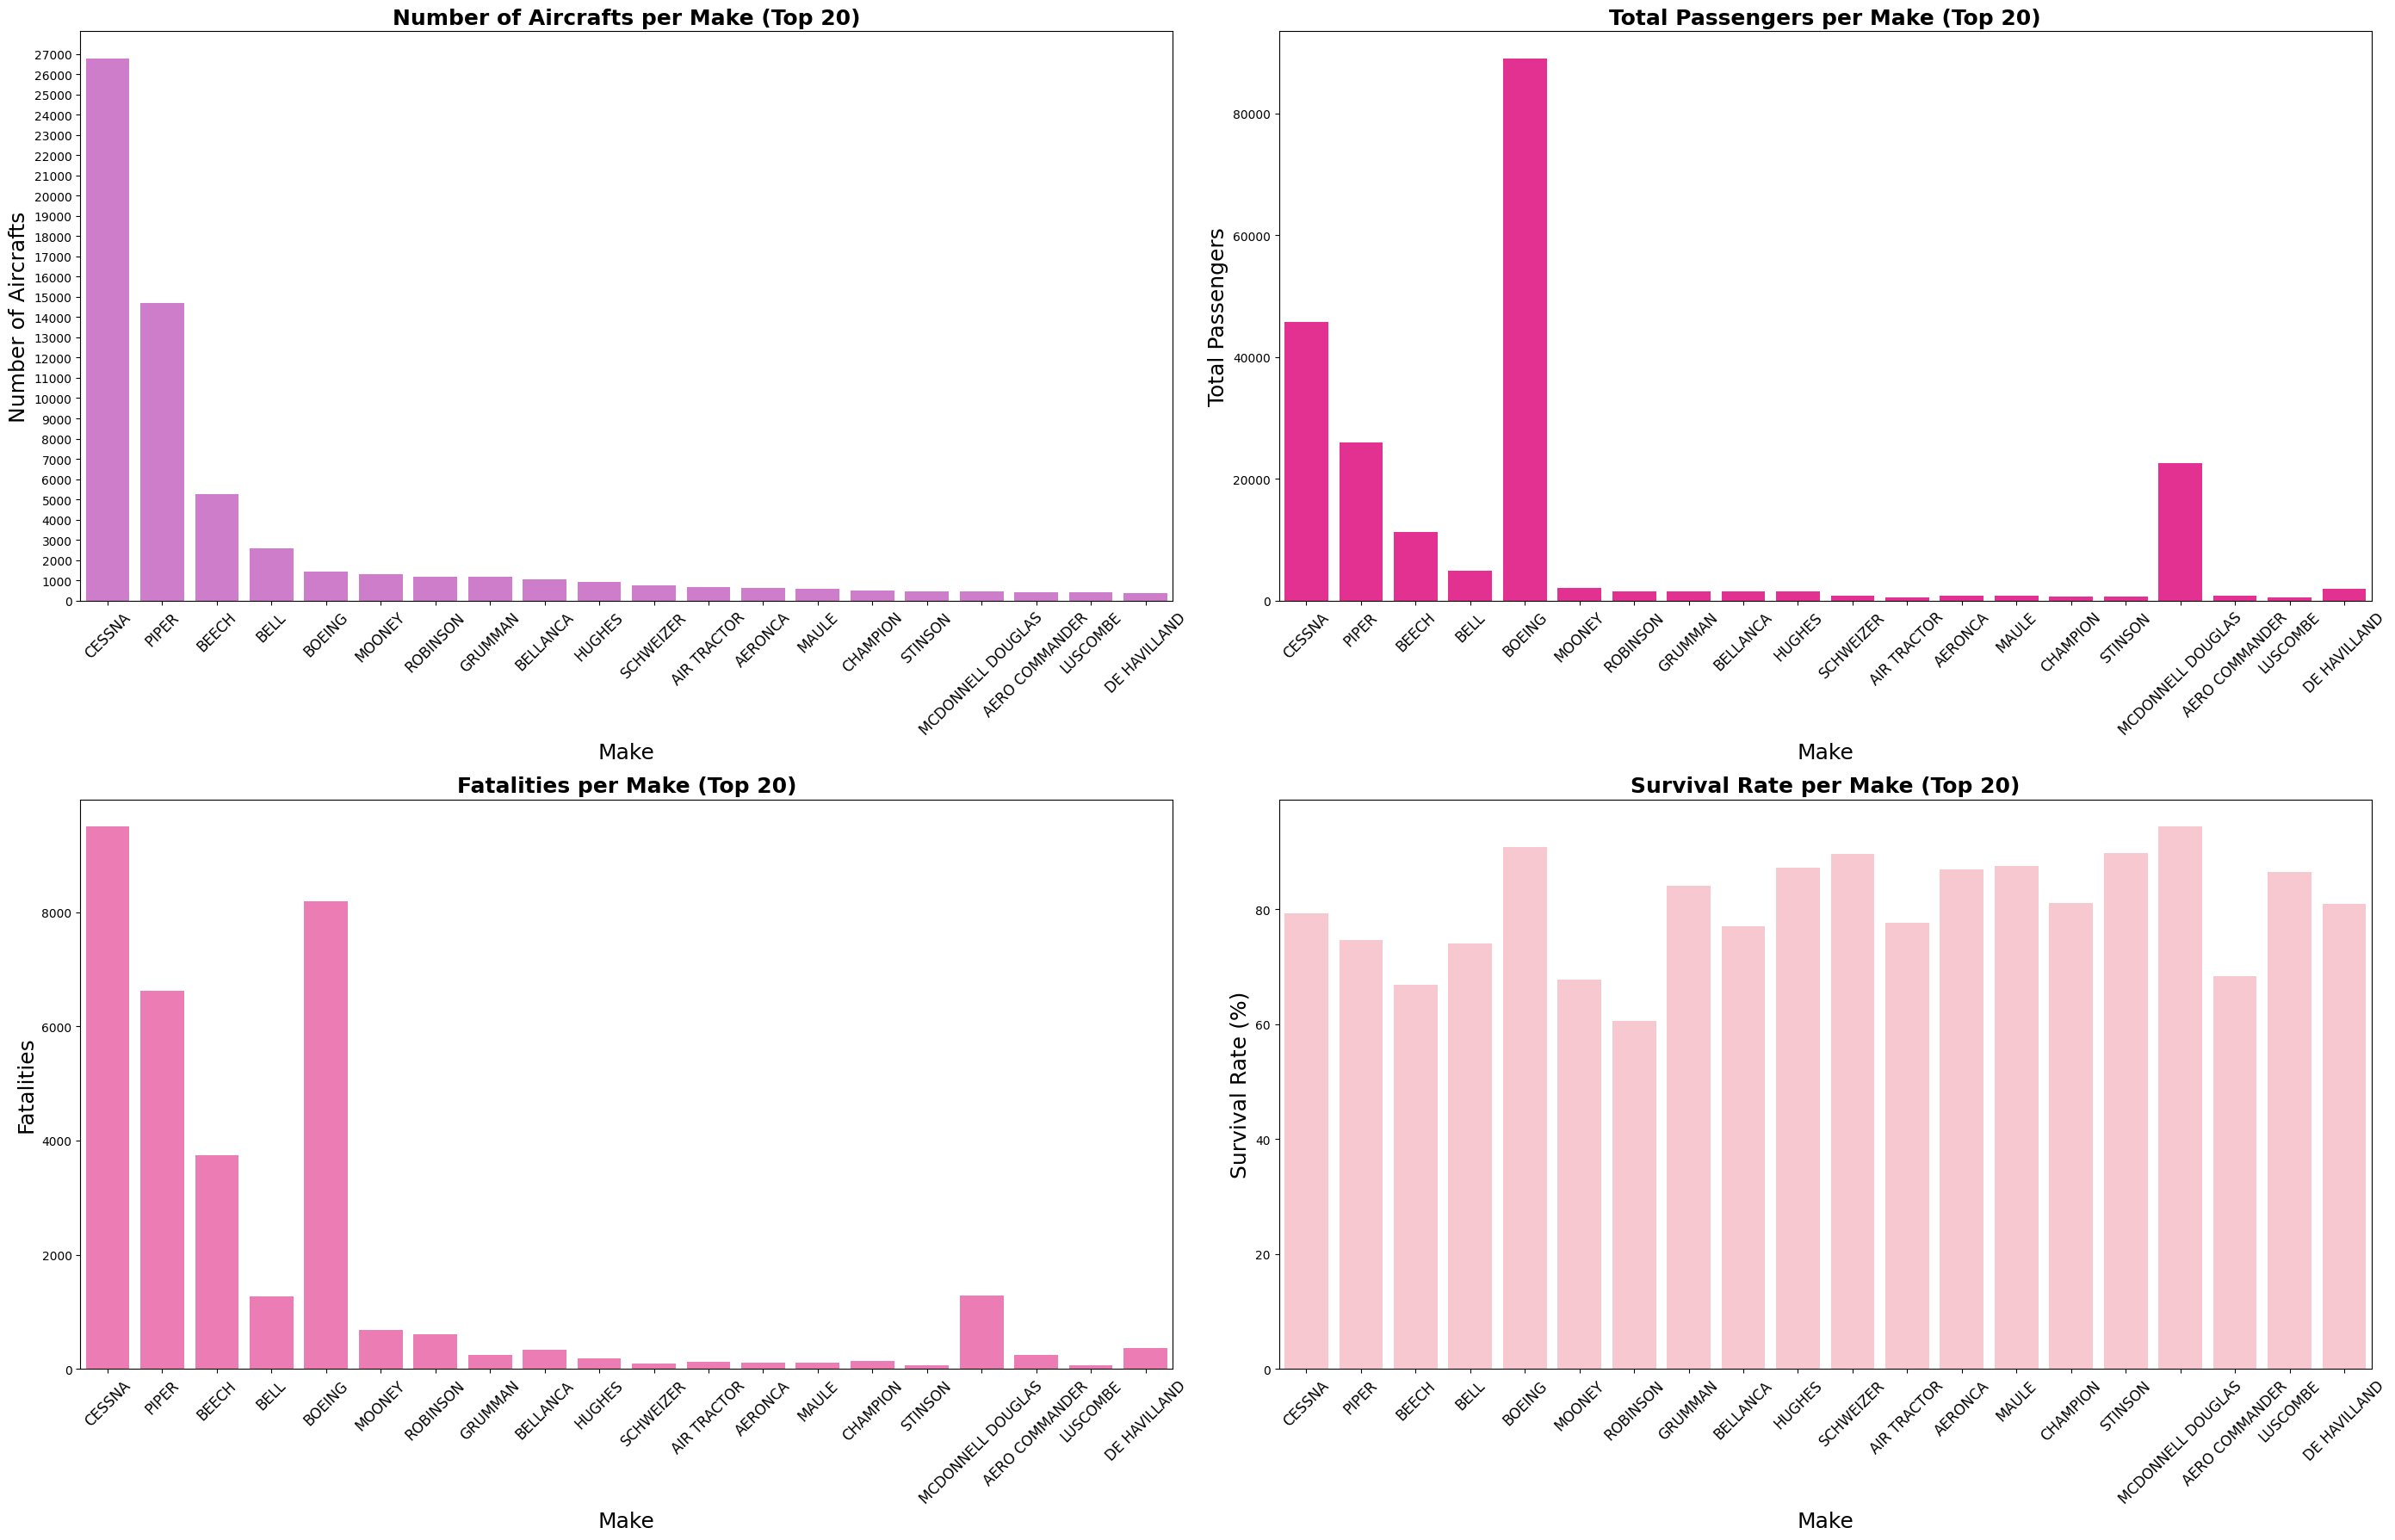

In [42]:
# 1. Calculate the number of aircrafts per make
num_aircrafts_per_make = df['Make'].value_counts()

# 2. Calculate the total number of passengers per make
total_passengers_per_make = df.groupby('Make')['Total.Passengers'].sum()

# 3. Calculate the number of fatalities per make
# Assuming there's a column 'Fatalities' that tracks the number of fatalities
fatalities_per_make = df.groupby('Make')['Total.Fatal.Injuries'].sum()

# 4. Calculate the survival rate per make
# Survival Rate = (Total Passengers - Fatalities) / Total Passengers * 100
survival_rate_per_make = ((total_passengers_per_make - fatalities_per_make) / total_passengers_per_make) * 100

#5. Create a DataFrame to combine all the information
summary_df = pd.DataFrame({
    'Number of Aircrafts': num_aircrafts_per_make,
    'Total Passengers': total_passengers_per_make,
    'Fatalities': fatalities_per_make,
    'Survival Rate': survival_rate_per_make})

#6. Sort the DataFrame by 'Number of Aircrafts'
summary_df = summary_df.sort_values(by='Number of Aircrafts', ascending=False)

#7. Limit to the top 20 makes
summary_df_top_20 = summary_df.head(20)

#5. Create subplots to show each aspect
plt.figure(figsize=(28, 18))

 # Subplot 1: Number of Aircrafts
ax1 = plt.subplot(2, 2, 1)
sns.barplot(x=summary_df_top_20.index, y=summary_df_top_20['Number of Aircrafts'], color='Orchid',ax=ax1)
ax1.set_title('Number of Aircrafts per Make (Top 20)', fontsize=18, fontweight='bold')
ax1.set_xlabel('Make', fontsize=18)
ax1.set_ylabel('Number of Aircrafts', fontsize=18)
plt.xticks(rotation=45, fontsize=12,)
ax1.set_yticks(np.arange(0, summary_df_top_20['Number of Aircrafts'].max() + 1000, 1000))

# Subplot 2: Total Passengers
ax2 = plt.subplot(2, 2, 2)
sns.barplot(x=summary_df_top_20.index, y=summary_df_top_20['Total Passengers'], color='deeppink', ax=ax2)
ax2.set_title('Total Passengers per Make (Top 20)', fontsize=18, fontweight='bold')
ax2.set_xlabel('Make', fontsize=18)
ax2.set_ylabel('Total Passengers', fontsize=18)
plt.xticks(rotation=45, fontsize=12,)

# Subplot 3: Fatalities
ax3 = plt.subplot(2, 2, 3)
sns.barplot(x=summary_df_top_20.index, y=summary_df_top_20['Fatalities'],color='hotpink', ax=ax3)
ax3.set_title('Fatalities per Make (Top 20)', fontsize=18, fontweight='bold')
ax3.set_xlabel('Make',fontsize=18)
ax3.set_ylabel('Fatalities', fontsize=18)
plt.xticks(rotation=45, fontsize=12,)

# Subplot 4: Survival Rate
ax4 = plt.subplot(2, 2, 4)
sns.barplot(x=summary_df_top_20.index, y=summary_df_top_20['Survival Rate'], color='pink',ax=ax4)
ax4.set_title('Survival Rate per Make (Top 20)', fontsize=18, fontweight='bold')
ax4.set_xlabel('Make', fontsize=18,)
ax4.set_ylabel('Survival Rate (%)', fontsize=18,)
plt.xticks(rotation=45, fontsize=12,)

plt.tight_layout()
plt.show()

### **Additional Plots that would help us further narrow down to the best aircraft option.**

#### **Line that shows the distribution of aircraft accidents across years**

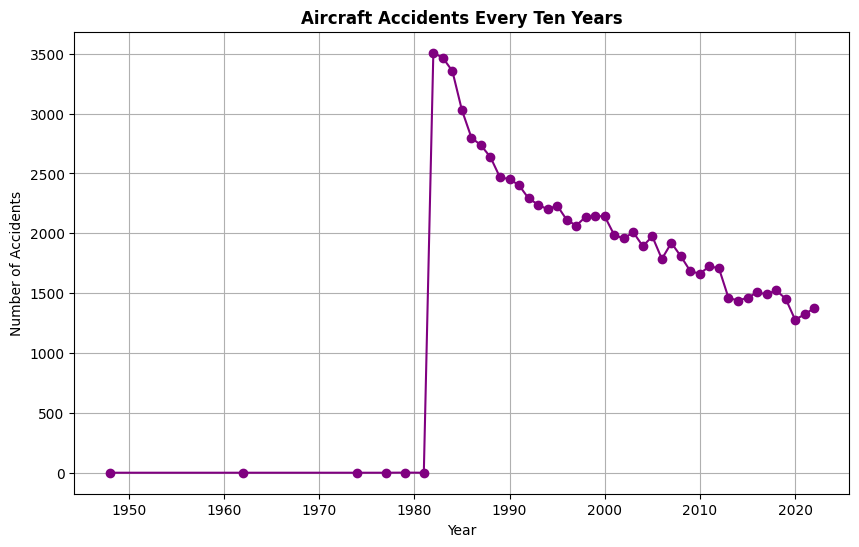

In [44]:
#find the years when accidents occured
df['year'] = df['Event.Date'].dt.year
accidents_per_year = df.groupby('year').size()
#plot a line plot showing accidents every 10 years
plt.figure(figsize=(10, 6))
accidents_per_year.plot(kind='line',color = 'purple', marker='o')
plt.title('Aircraft Accidents Every Ten Years', fontweight='bold', )
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()



#### **Create a Stacked Bar Plot to show the Damage on Top 20 Aircrafts**

In [45]:
df['Aircraft.damage'].unique()
df['Aircraft.damage'].value_counts()

,count
Aircraft.damage,
Substantial,63775
Destroyed,18425
Minor,2556
Unknown,92


In [46]:
#Replace Unknown and Null categories with Minor for Aircraft.damage
df['Aircraft.damage']= df['Aircraft.damage'].replace({'Unknown': 'Minor'}).fillna('Minor')


<Figure size 1000x600 with 0 Axes>

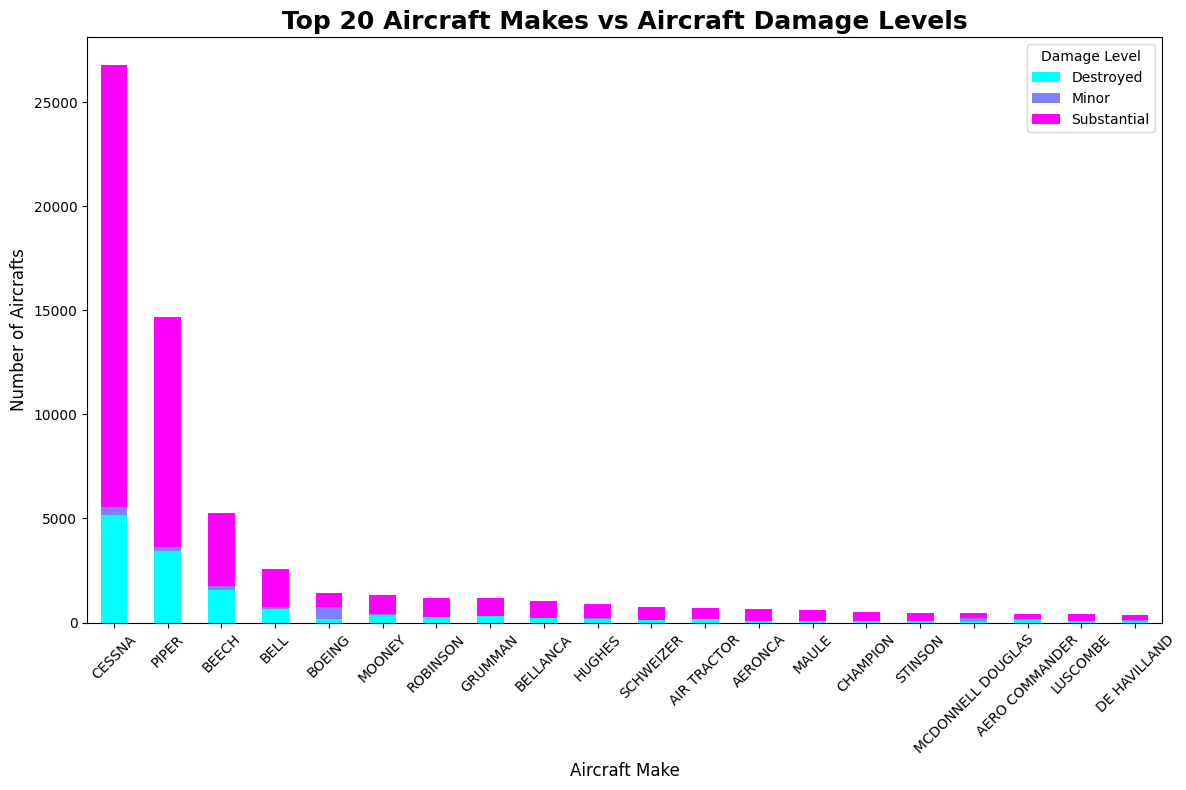

In [73]:
# Group by Make and Aircraft.damage and count the occurrences
damage_counts = df.groupby(['Make', 'Aircraft.damage']).size().unstack()

# Sort by the total number of aircrafts in each make and select top 20 makes
top_20_makes = df['Make'].value_counts().head(20).index
damage_counts_top_20 = damage_counts.loc[top_20_makes]

# Create a stacked bar plot for each make with damage distribution
plt.figure(figsize=(10, 6))
damage_counts_top_20.plot(kind='bar', stacked=True,colormap='cool', figsize=(12, 8))

plt.title('Top 20 Aircraft Makes vs Aircraft Damage Levels', fontsize=18, fontweight='bold')
plt.xlabel('Aircraft Make', fontsize=12)
plt.ylabel('Number of Aircrafts', fontsize=12)
plt.xticks(rotation=45,)
plt.legend(title='Damage Level')
plt.tight_layout()
plt.show()


#### **Plot to show the number of engines for Top 20 Aircrafts**

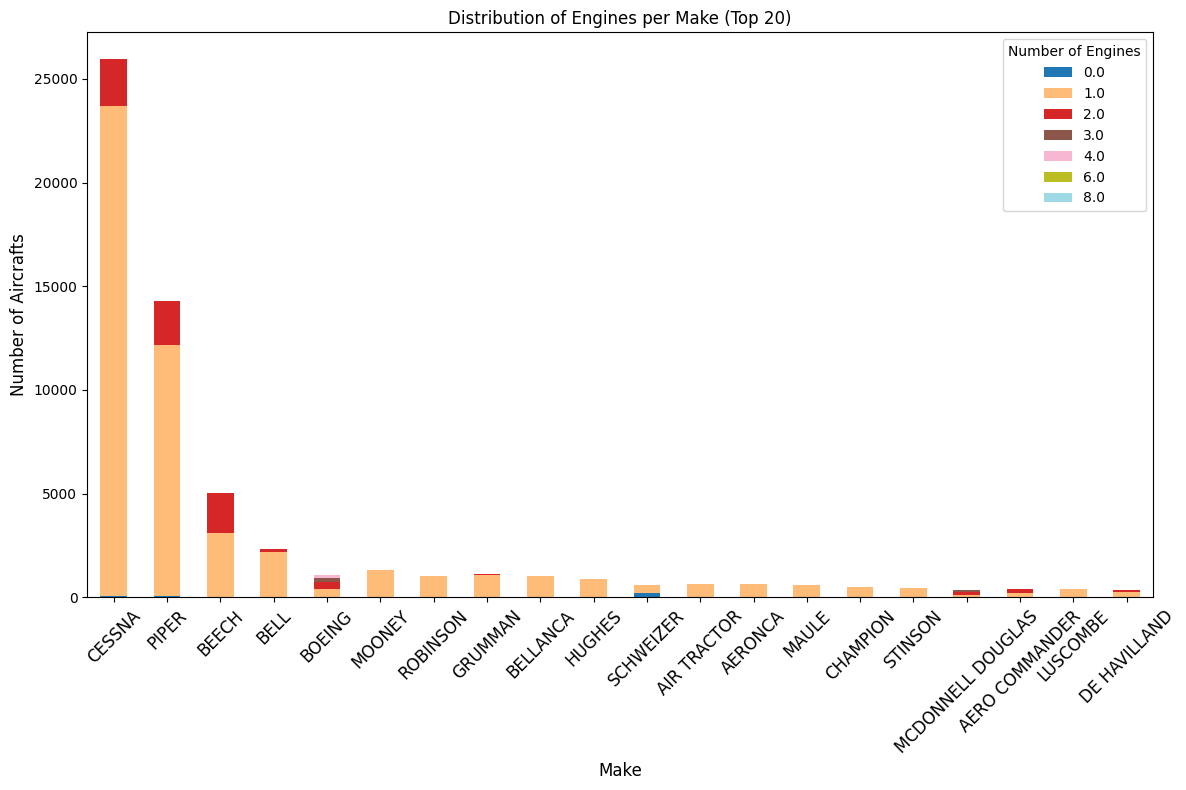

In [83]:
# remove rows with missing engine counts
df_filtered = df.dropna(subset=['Number.of.Engines'])

# Get the counts of aircrafts with 1, 2, 3, or 4 engines for each make
# Group by Make and Number.of.Engines, then count the occurrences
engine_counts_per_make = df_filtered.groupby(['Make', 'Number.of.Engines']).size().unstack(fill_value=0)

#Select the top 20 makes based on the total number of aircrafts
top_20_makes = summary_df_top_20.index
engine_counts_per_make_top_20 = engine_counts_per_make.loc[top_20_makes]

# Create a stacked bar plot for each make and engine count
engine_counts_per_make_top_20.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 8))
plt.title('Distribution of Engines per Make (Top 20)')
plt.xlabel('Make', fontsize=12)
plt.ylabel('Number of Aircrafts', fontsize=12)
plt.xticks(rotation=45, fontsize=12,)
plt.legend(title='Number of Engines')

plt.tight_layout()
plt.show()

#**CONCLUSIONS**
**Top Aircraft Manufacturers (BOEING and MCDONNELL DOUGLAS):**
Based on the data analysis:
BOEING and MCDONNELL DOUGLAS emerge as the top aircraft manufacturers when considering both market demand and safety post-accident performance.
Market Demand: These manufacturers have a strong presence in the global market, as evidenced by the number of aircraft in operation.

Market Demand: **North America** leads in market demand for aircraft, with the highest number of aircraft in operation, indicating a large aviation market. This suggests that North America is a key region for aviation companies to focus on when entering the industry.
Survival Rate: The best survival rates were observed in North America, reflecting better safety measures, advanced aviation technologies, and a strong regulatory environment.

**Recommendations for Entering the Aviation Industry:**

Based on the findings, it would make strategic business sense for the company entering the aviation industry to consider:
Partnerships or investments in Boeing and McDonnell Douglas aircraft due to their strong market presence and safety records.
Focusing efforts on North American markets, given their high demand for aircraft and excellent survival rates, which align with industry standards for safety and operational success.
